In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
df = pd.read_csv('/content/water_quality.csv')
print('=====Water Quality Data=========')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Increase display width
print(df.sample(20))
print('=====Dataset size=========')
df.shape

=====Water Quality Data=========
             ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
234    3.664711  201.097316  28102.756630     5.682035  330.023531    291.148449       17.470631        75.101801   3.316158           0
2241        NaN  170.291426  14550.417010     7.847404  395.495954    486.367693       13.797578        51.415910   3.794033           0
3184   8.285072  151.573778  14402.726700     9.050080  303.081838    322.521815       13.652653       114.034946   4.274661           1
1831   7.079304  137.007355  24282.154770     5.705693  433.633900    342.725318        9.113945        88.328605   5.553174           0
513    6.844351  197.460469  23608.862240     8.396405         NaN    526.425915       10.878096        62.037143   2.877063           0
3249  10.808157  198.596751  29614.348790     5.782418  304.622061    383.269410       14.902820        47.896406   4.362542           1
2543   7

(3276, 10)

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
=====Data Preprocessing=========
[[0.50577104 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.672822

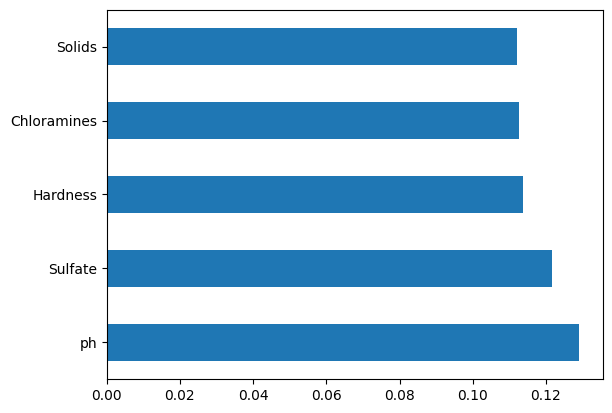

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('water_quality.csv')

print("Data Information\n==================")
print(df.info())

print("=====Data Preprocessing=========")
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill NaNs with mean

X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

oversample = SMOTE()
X, y = oversample.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(5).plot(kind='barh')
plt.show()



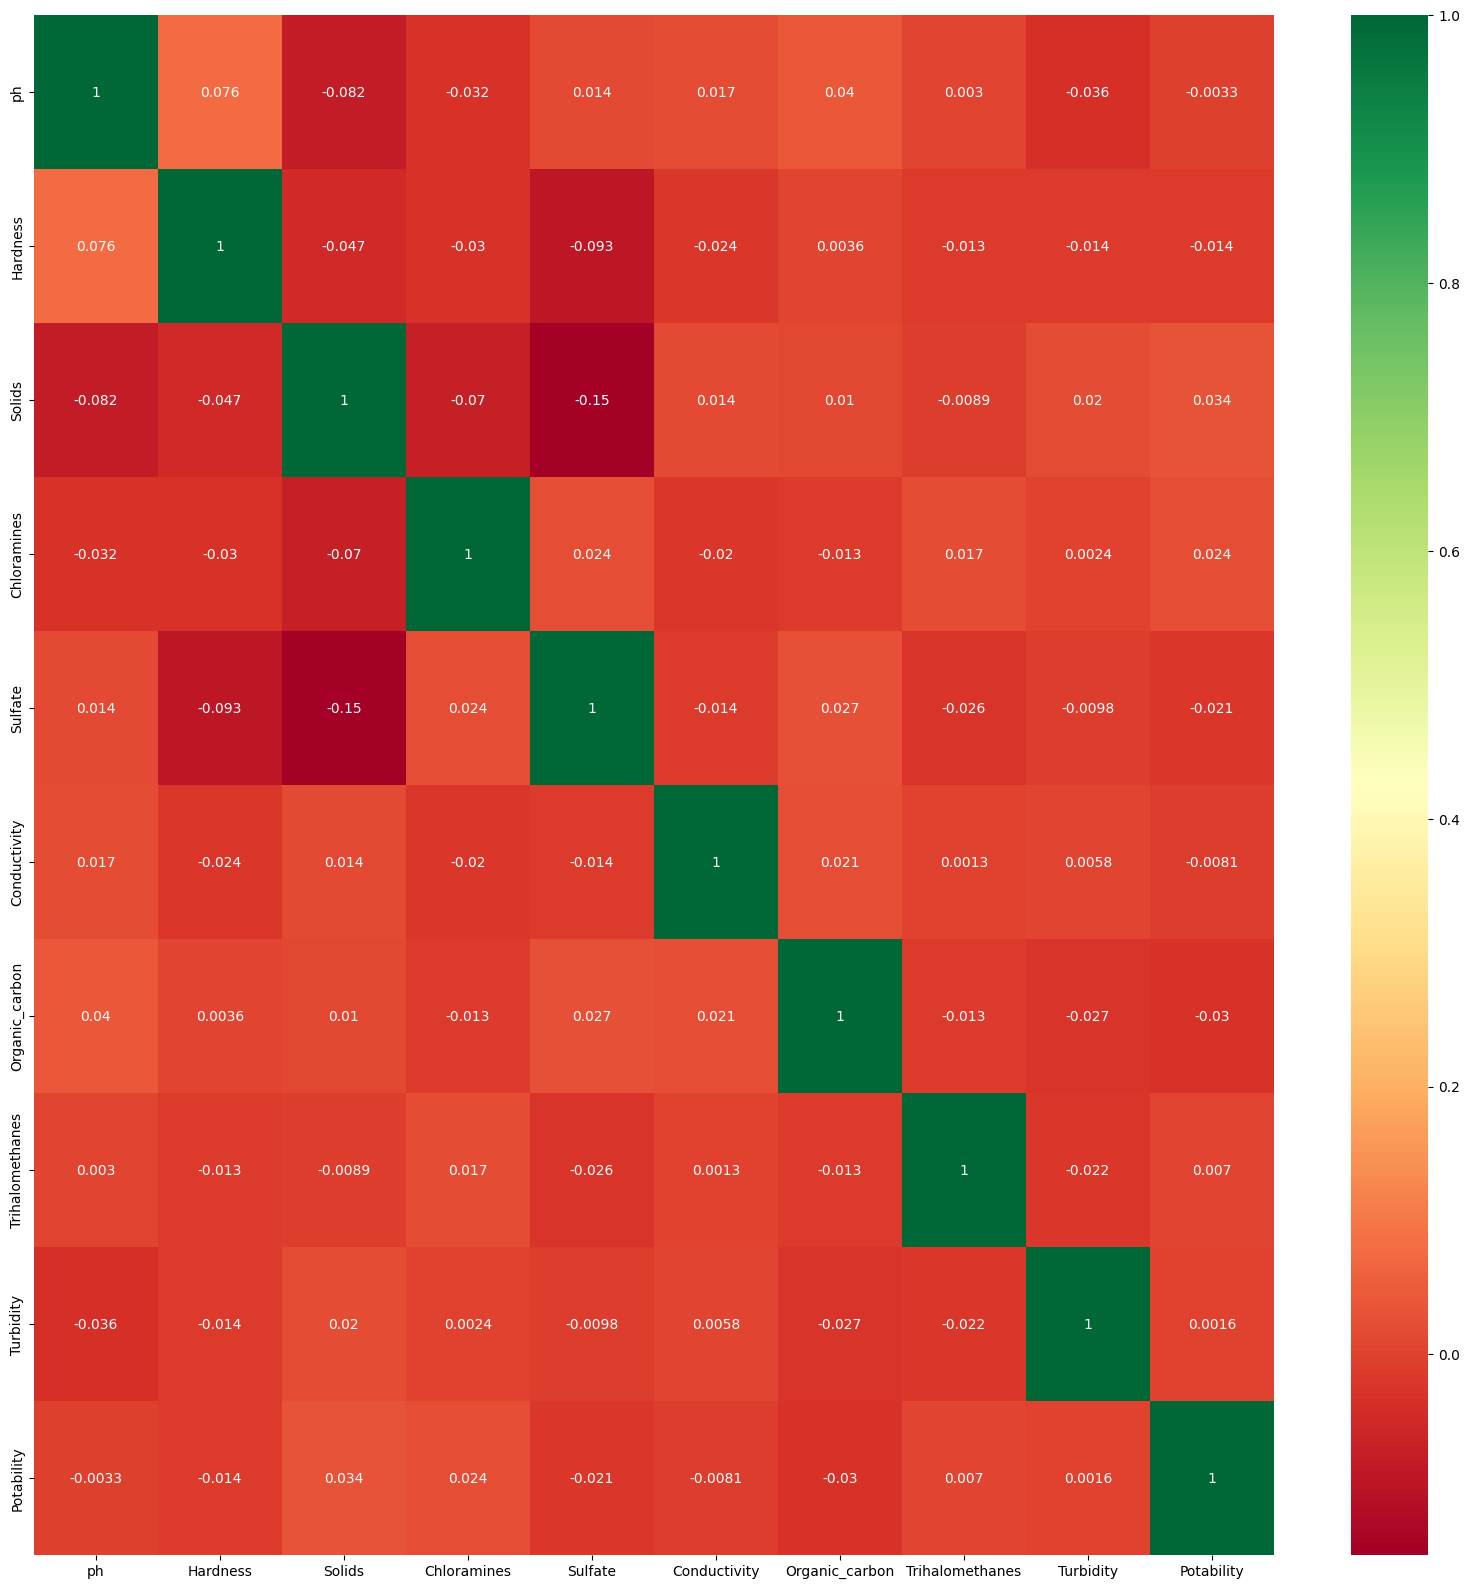

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=df.fillna(0)
df = df.replace("NAN", 0)
print('Data Information')
print('==================')
print(df.info())
X_data=df.iloc[:,:-1]
y_data=df.iloc[:,-1]
Pre_Data=scaler.fit_transform(X_data)
X = Pre_Data
y=scaler.fit_transform(np.array(y_data).reshape(-1, 1))
print('=====Data Preprocessing=========')
print(X)

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
=====Data Preprocessing=========
[[0.50577104 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.672822

=====XGBoost - Prediction Result=========
[0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1

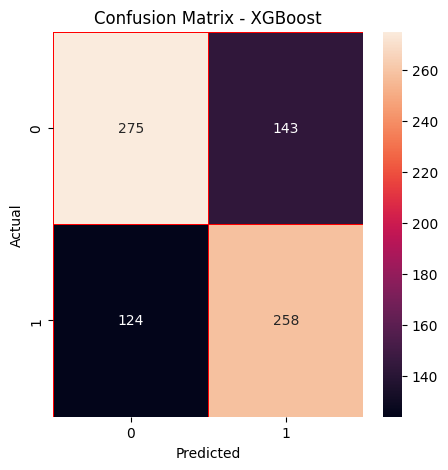

In [23]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

# Initialize and train model
xg = xgb.XGBClassifier(n_estimators=20)
xg.fit(X_train, y_train)

# Predict
y_predict = xg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_predict)
print('=====XGBoost - Prediction Result=========')
print(y_predict)
print('Accuracy of XGBoost: ' + str(accuracy))

# More metrics
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))

print('\nClassification Report:\n')
print(classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


Accuracy of SVM: 0.5125
Precision of SVM: 0.5216688368055555
Recall of SVM: 0.5125
F1-score of SVM: 0.5030614863965626
              precision    recall  f1-score   support

           0       0.55      0.38      0.45       418
           1       0.49      0.66      0.56       382

    accuracy                           0.51       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.51      0.50       800



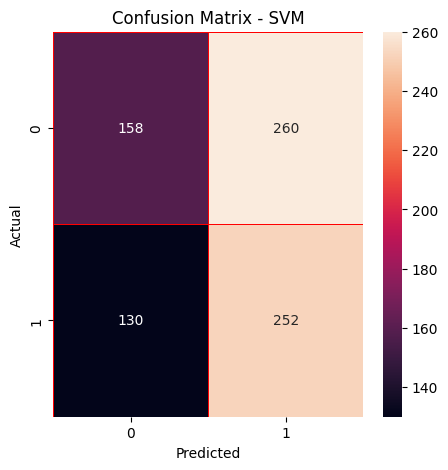

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM model
SVM = SVC(kernel='linear', C=1.0, random_state=0)
SVM.fit(X_train, y_train)

# Predictions
y_predict = SVM.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy of SVM:', accuracy)

# Precision, Recall, F1
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM:', precision)
print('Recall of SVM:', recall)
print('F1-score of SVM:', fscore)

# Classification Report
print(classification_report(y_test, y_predict))

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
